In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
train = pd.read_csv('train.csv', index_col= 0)
test = pd.read_csv('test.csv', index_col= 0)

In [36]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, fffe3900350033003300 to fffe3700310031003600
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Name            6500 non-null   object 
 1   Artist Reputation      6500 non-null   float64
 2   Height                 6500 non-null   float64
 3   Width                  6500 non-null   float64
 4   Weight                 6500 non-null   float64
 5   Material               6500 non-null   object 
 6   Price Of Sculpture     6500 non-null   float64
 7   Base Shipping Price    6500 non-null   float64
 8   International          6500 non-null   object 
 9   Express Shipment       6500 non-null   object 
 10  Installation Included  6500 non-null   object 
 11  Transport              6500 non-null   object 
 12  Fragile                6500 non-null   object 
 13  Customer Information   6500 non-null   object 
 14  Remote Location        650

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
Customer Id,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
fffe350031003300,Robert Chaires,0.12,9.0,10.0,1622.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [8]:
train.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [11]:
train['Artist Reputation'].fillna(0.46, inplace = True)
test['Artist Reputation'].fillna(0.46, inplace = True)

In [18]:
train['Height'].fillna(22.0, inplace = True)
test['Height'].fillna(22.0, inplace = True)

In [22]:
train['Width'].fillna(10.0, inplace = True)
test['Width'].fillna(10.0, inplace = True)

In [24]:
import random
def fillMat(weight):
    light = ['Clay', 'Aluminium', 'Wood']
    med = ['Brass', 'Bronze']
    heav = ['Stone', 'Marble']
    if weight < 4000:
        material = random.choice(light)
    elif weight < 30000:
        material = random.choice(med)
    else:
        material = random.choice(heav)

    return material

In [25]:
train['Material'].fillna(value = train['Weight'].apply(lambda x: fillMat(x)), inplace = True)

In [26]:
test['Material'].fillna(value = test['Weight'].apply(lambda x: fillMat(x)), inplace = True)

In [28]:
def fillWeight(material):
    weight = 0
    light = ['Clay', 'Aluminium', 'Wood']
    med = ['Brass', 'Bronze']
    heav = ['Stone', 'Marble']
    if material in light:
        weight = 1622
    elif material in med:
        weight = 21679
    else:
        weight = 1422981
    return weight

In [29]:
train['Weight'].fillna(value = train['Material'].apply(lambda x: fillWeight(x)), inplace = True)

In [30]:
test['Weight'].fillna(value = test['Material'].apply(lambda x: fillWeight(x)), inplace = True)

In [32]:
transport = ['Airways', 'Roadways', 'Waterways']
train['Transport'].fillna(value = np.random.choice(transport, p = [0.35, 0.41, 0.24]), inplace = True)

In [33]:
test['Transport'].fillna(value = np.random.choice(transport, p = [0.35, 0.41, 0.24]), inplace = True)

In [35]:
train['Remote Location'].fillna(np.random.choice(['Yes', 'No'], p = [0.20, 0.80]), inplace = True)
test['Remote Location'].fillna(np.random.choice(['Yes', 'No'], p = [0.20, 0.80]), inplace = True)

Now we have no Null values, I'll take the absolute value of the cost now since we have many negative values there, then normalize it with a log transformation

In [39]:
train['Cost'] = train['Cost'].apply(lambda x:abs(x))

In [43]:
train['log_Cost'] = np.log(train['Cost'])

In [45]:
train.drop(columns=['Artist Name', 'Scheduled Date', 
                    'Delivery Date', 'Customer Location'], inplace = True)

In [57]:
test.drop(columns=['Artist Name', 'Scheduled Date', 
                    'Delivery Date', 'Customer Location'], inplace = True)

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [59]:
cat = (train.dtypes == 'object')
ob_cols = list(cat[cat].index)
print('Categorical Variables:')
print(ob_cols)

Categorical Variables:
['Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location']


In [60]:
cat_train = train.copy()
cat_test = test.copy()

In [61]:
label_encoder = LabelEncoder()
for col in ob_cols:
    cat_train[col] = label_encoder.fit_transform(train[col])
    cat_test[col] = label_encoder.fit_transform(test[col])

In [63]:
cat_train

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,log_Cost
Customer Id,,,,,,,,,,,,,,,,
fffe3900350033003300,0.26,17.0,6.0,4128.0,1,13.91,16.27,1,1,0,0,0,1,0,283.29,5.646471
fffe3800330031003900,0.28,3.0,3.0,61.0,1,6.83,15.00,0,0,0,1,0,1,0,159.96,5.074924
fffe3600370035003100,0.07,8.0,5.0,237.0,3,4.96,21.18,0,0,0,1,1,1,1,154.29,5.038834
fffe350031003300,0.12,9.0,10.0,1622.0,0,5.81,16.31,0,0,0,1,0,0,1,161.16,5.082398
fffe3900320038003400,0.15,17.0,6.0,324.0,0,3.18,11.94,1,1,1,0,0,1,0,159.23,5.070350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3800370037003300,0.37,37.0,10.0,16551.0,1,28.28,38.46,1,1,0,0,0,0,1,872.43,6.771282
fffe310036003400,0.67,15.0,10.0,18981.0,1,67.18,27.72,0,0,0,1,0,1,0,1347.02,7.205650
fffe3600300031003300,0.68,19.0,8.0,587.0,3,6.92,10.38,1,0,0,1,1,0,0,354.55,5.870849


In [67]:
X = cat_train.drop(columns=['Cost', 'log_Cost'])
y = cat_train['log_Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [68]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
pred = rf.predict(X_test)

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.20200338771466037
MSE: 0.10659253048213403
RMSE: 0.3264851152535656


Text(0, 0.5, 'Predicted Y')

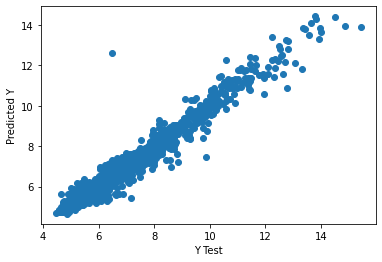

In [72]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
dparam = [{'n_estimators' : [50,100,250,500],
          'max_depth' : [10,50,100],
          'bootstrap': [True, False]}]

In [93]:
rsf = RandomizedSearchCV(rf, dparam, cv = 10)
rsf.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 50, 100],
                                         'n_estimators': [50, 100, 250, 500]}])

In [94]:
best_rf = rsf.best_estimator_

In [95]:
best_rf

RandomForestRegressor(max_depth=100, n_estimators=250, random_state=42)

In [96]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=250, random_state=42)

In [97]:
best_pred = best_rf.predict(X_test)

In [98]:
best_pred

array([6.17981209, 5.18146668, 6.17785635, ..., 8.45908471, 7.33326968,
       5.25042474])

In [101]:
score = 100*max(0, 1-metrics.mean_squared_log_error(y_test, best_pred))
score

99.85448109210935

In [102]:
best_t_pred = best_rf.predict(cat_test)

In [103]:
test['Cost'] = np.expm1(best_t_pred)

In [104]:
submission = test['Cost']

In [105]:
submission.to_csv('submission.csv')